# 데이터셋 출처
* https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터 구성
* Pregnancies : 임신횟수
* Glucose : 2시간 동안의경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린(mu U / ml)
* BMI : 체질량 지수(체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드한다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Engineering

## 수치형 변수를 범주형 변수로 만들기

In [20]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]]

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False
...,...,...
763,10,True
764,2,False
765,5,False
766,1,False


In [83]:
# One-Hot-Encoding
# 수치 => 범주형 => 수치

df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]]

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False
...,...,...,...,...
763,63,False,False,True
764,27,True,False,False
765,30,False,True,False
766,47,False,True,False


<AxesSubplot:xlabel='Age_high', ylabel='count'>

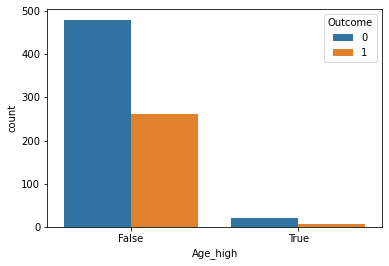

In [84]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

## 결측치 다루기

In [108]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [109]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [174]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [175]:
df["Insulin_nan"].isnull().sum()

374

In [176]:
# 결측치 비율

df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [177]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

<ipython-input-177-bea675cdc2dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [178]:
# 결측치 채우기

df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5

## 정규분포 만들기
* 왜도, 첨도

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

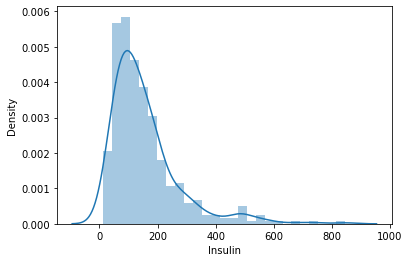

In [201]:
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

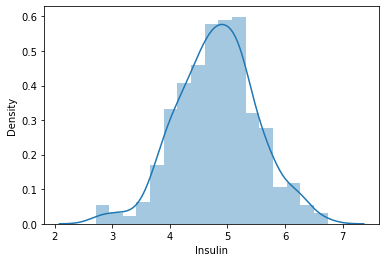

In [203]:
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_nan', ylabel='Density'>

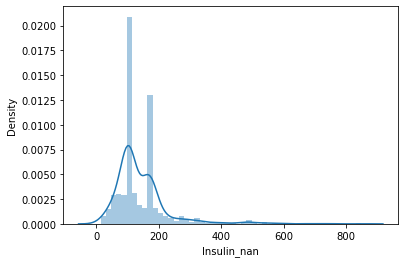

In [205]:
sns.distplot(df["Insulin_nan"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_log', ylabel='Density'>

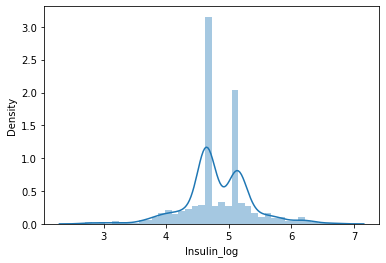

In [207]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

## 파생변수 만들기
* EDA 에서 해 본 상관분석을 바탕으로 파생변수 생성

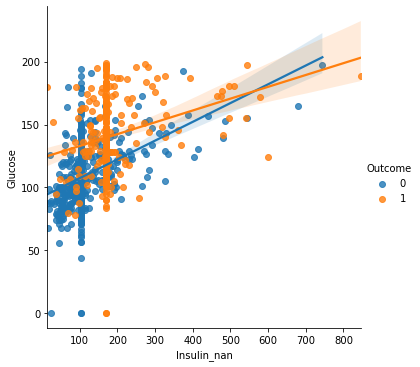

In [232]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

In [237]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [239]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


## 이상치(outlier) 다루기

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin_nan'>

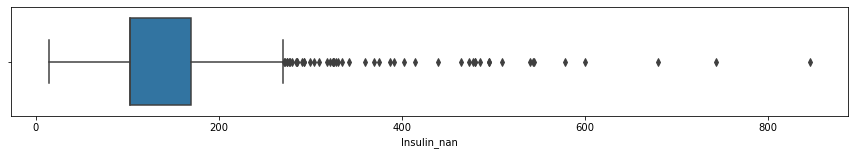

In [268]:
plt.figure(figsize=(15,2))
sns.boxplot(df["Insulin_nan"])

In [269]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [273]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [275]:
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [276]:
df[df["Insulin_nan"] > OUT].shape

(51, 16)

In [310]:
df[df["Insulin_nan"] > 600].shape

(3, 16)

## Scaling

In [356]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,0,36.8,0.340,27,0,False,True,False,False,102.5,4.639572,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False


In [386]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [387]:
# df[["Glucose", "DiabetesPedigreeFunction"]] = scale
# df[["Glucose", "DiabetesPedigreeFunction"]].head()

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>]],
      dtype=object)

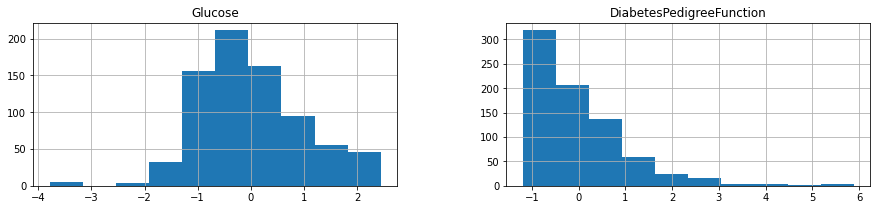

In [388]:
df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15,3))

# CSV 파일로 저장하기

In [415]:
df.to_csv("data/diabetes_feature.csv", index=False)

In [416]:
pd.read_csv("data/diabetes_feature.csv").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


# 학습, 예측 데이터셋 나누기

In [417]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담는다.

split_count = int(df.shape[0] * 0.8)
split_count

614

In [418]:
# train, test로 슬라이싱을 통해 데이터를 나눈다.

train = df[:split_count].copy()
train.shape

(614, 16)

In [419]:
train[train["Insulin_nan"] < 600].shape

(610, 16)

In [420]:
train = train[train["Insulin_nan"] < 600]
train.shape

(610, 16)

In [421]:
test = df[split_count:].copy()
test.shape

(154, 16)

# 학습, 예측에 사용할 컬럼

In [422]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.

feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")

feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

# 정답값이자 예측해야 될 값

In [423]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.

label_name = "Outcome"
label_name

'Outcome'

# 학습, 예측 데이터셋 만들기

In [424]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,0.848324,72,35,33.6,0.468492,50,False,169.5,False
1,-1.123396,66,29,26.6,-0.365061,31,False,102.5,True
2,1.943724,64,0,23.3,0.604397,32,True,169.5,False
3,-0.998208,66,23,28.1,-0.920763,21,False,94.0,True
4,0.504055,40,35,43.1,5.484909,33,False,168.0,False


In [425]:
# 정답값을 만들어 준다. 예) 기출문제의 정답

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [426]:
# 예측에 사용할 데이터세트를 만든다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,0.535352,74,26,36.1,0.257084,50,True,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,False,102.5,False
616,-0.121888,96,0,28.7,-0.950964,30,False,102.5,False
617,-1.655448,62,13,20.1,-0.648952,23,False,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,True,169.5,False


In [427]:
# 예측의 정답값 예) 실전 시험 문제의 정답

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [428]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

# 학습(훈련)
* 시험을 볼 때 기출문제(X_train) 와 정답(y_train)을 보고 공부하는 과정과 유사하다.

In [429]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# 예측
* 실전 시험문제(X_train) 라고 보면 된다. 우리가 정답을 직접 예측한다.

In [430]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

# 트리 알고리즘 분석하기
* 의사결정나무를 시각화 한다.

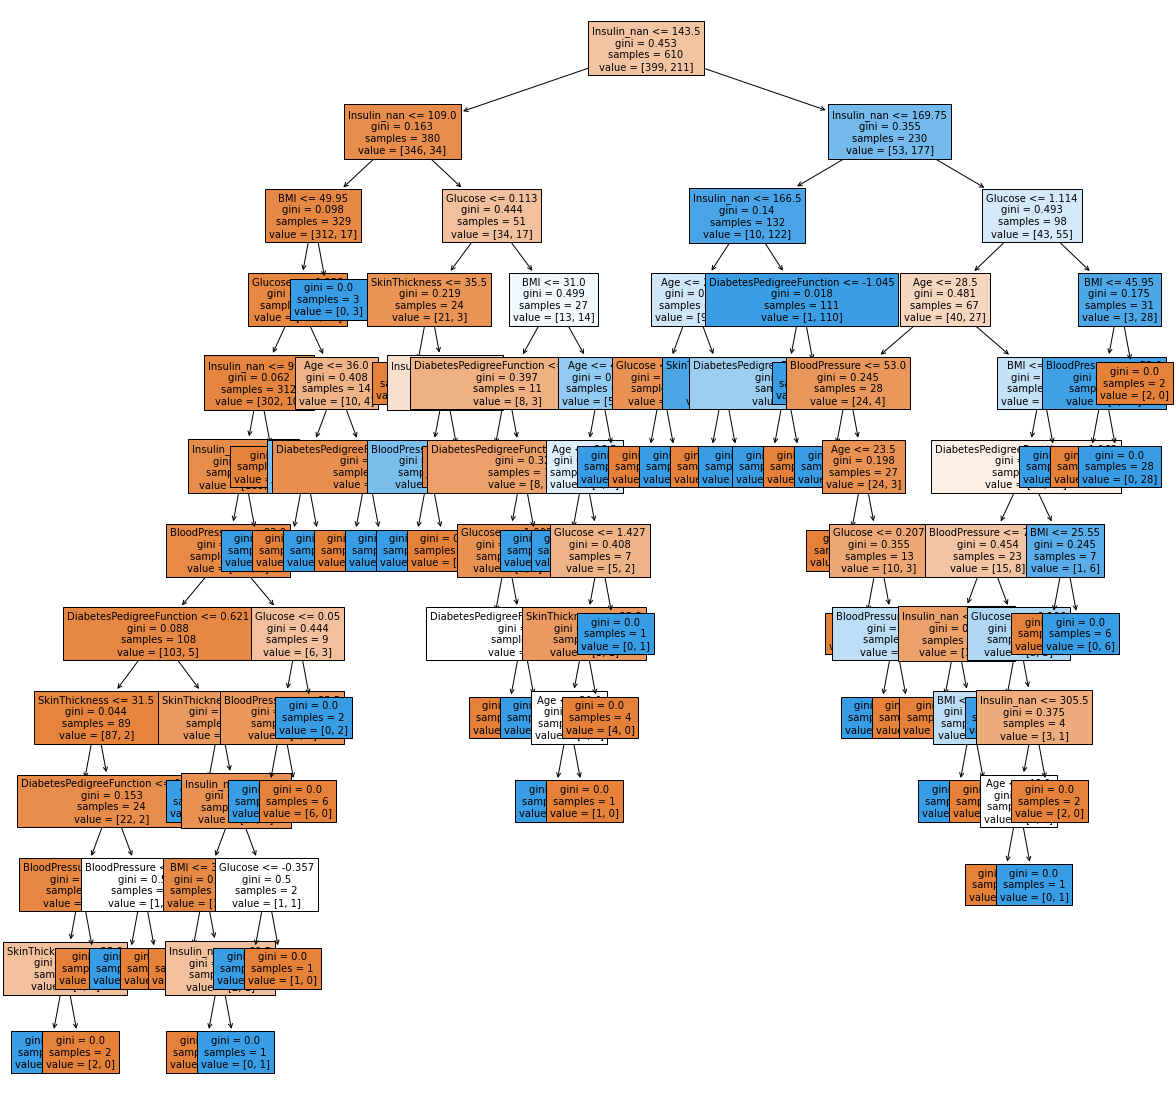

In [431]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, 
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

In [432]:
# graphviz 를 통해 시각화 한다.
# graphviz 는 별도의 설치가 필요하다.
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주어야 한다.
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                            feature_names = feature_names,
#                            filled=True)
# graphviz.Source(dot_tree)

In [433]:
# 피처의 중요도 추출

model.feature_importances_

array([0.10058253, 0.05035192, 0.02679164, 0.0716271 , 0.04160415,
       0.08634788, 0.        , 0.62269477, 0.        ])

<AxesSubplot:>

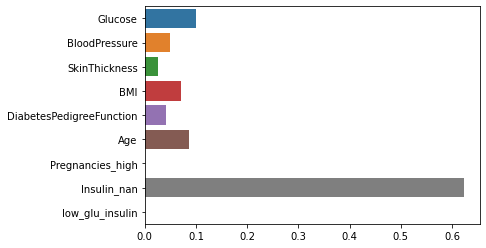

In [434]:
# 피처의 중요도 시각화하기

sns.barplot(x=model.feature_importances_, y=feature_names)

# 정확도(Accuracy) 측정하기

In [435]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 된다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.
# 44 => 39(임신회수 6회 기준) => 51(나이 25세 기준) => 55(나이 30세 기준)) 
# => 26(인슐린 결측치를 평균으로 대체) => 16(인슐린 결측치 중앙값으로 대체)
# => 19(인슐린 & 글루코스 상관계수로 파생변수 생성)
# => 19(인슐린 수치 600이상 이상치 제거)

diff_count = abs(y_test - y_predict).sum()
diff_count

17

In [436]:
# 예측의 정확도를 구한다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 된다.
# 73 => 83(인슐린 결측치 평균으로 대체) => 89(인슐린 결측치 중앙값으로 대체)
# => 87(인슐린 & 글루코스 상관계수로 파생변수 생성)
# => 87(인슐린 수치 600이상 이상치 제거)

(len(y_test) - diff_count) / len(y_test) * 100

88.96103896103897

In [437]:
# 위에서처럼 직접 구할수도 있지만, 미리 구현된 알고리즘을 가져와 사용한다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

88.96103896103897

In [438]:
# model 의 score 로 점수를 계산한다.(정답값을 알고 있는 경우에)

model.score(X_test, y_test) * 100

88.96103896103897